In [95]:
import os
import tensorflow
from tensorflow import keras
import PIL.Image
import PIL.ExifTags
from PIL.ExifTags import TAGS
import json
import numpy as np

directory = 'C:\\Users\\Yabba\\Documents\\Projects\\SeniorResearch\\OBJ2CNN\\OutputPics\\Morb512'

train_images = []
train_targets = []
validation_images = []
validation_targets = []

val_split = 2/10
#img = PIL.Image.open(directory+os.listdir(directory)[0])
#print(directory+os.listdir(directory)[0])
#print((img.info['Note']))

inputImages = os.listdir(directory)

for i, d in enumerate(inputImages) :
    img = PIL.Image.open(directory+d)
    
    if i < len(inputImages) - len(inputImages)*val_split :
        image = keras.preprocessing.image.load_img(directory+d)
        train_images.append(keras.preprocessing.image.img_to_array(image))
        train_targets.append((np.asarray(eval(img.info['Note'])['BBox3D']).flatten()))
    else :
        image = keras.preprocessing.image.load_img(directory+d)
        validation_images.append(keras.preprocessing.image.img_to_array(image))
        validation_targets.append((np.asarray(eval(img.info['Note'])['BBox3D']).flatten()))
    pass
#print(type(train_targets[0]))

print ('{:03d} training images'.format(len(train_images)))
print ('{:03d} validation images'.format(len(validation_images)))

print ('{:03d} training targets'.format(len(train_targets)))
print ('{:03d} validation targets'.format(len(validation_targets)))

print ('{} training target'.format(type(train_targets[0])))
print ('{} validation targets'.format(type(validation_targets[0])))

#print(list(train_targets[0]))
#print(type(train_targets[0][0]))
display(train_images[0])

train_images = tensorflow.stack(train_images)
train_targets = tensorflow.stack(train_targets)
validation_images = tensorflow.stack(validation_images)
validation_targets = tensorflow.stack(validation_targets)


103 training images
025 validation images
103 training targets
025 validation targets
<class 'numpy.ndarray'> training target
<class 'numpy.ndarray'> validation targets


array([[[145., 145., 145.],
        [145., 145., 145.],
        [145., 145., 145.],
        ...,
        [145., 145., 145.],
        [146., 146., 146.],
        [145., 145., 145.]],

       [[145., 145., 145.],
        [146., 146., 146.],
        [145., 145., 145.],
        ...,
        [145., 145., 145.],
        [145., 145., 145.],
        [145., 145., 145.]],

       [[145., 145., 145.],
        [144., 144., 144.],
        [145., 145., 145.],
        ...,
        [145., 145., 145.],
        [146., 146., 146.],
        [146., 146., 146.]],

       ...,

       [[145., 145., 145.],
        [145., 145., 145.],
        [146., 146., 146.],
        ...,
        [146., 146., 146.],
        [145., 145., 145.],
        [145., 145., 145.]],

       [[145., 145., 145.],
        [145., 145., 145.],
        [145., 145., 145.],
        ...,
        [145., 145., 145.],
        [145., 145., 145.],
        [146., 146., 146.]],

       [[144., 144., 144.],
        [145., 145., 145.],
        [145., 1

In [96]:
#import tensorflow as tf
from keras import layers
from keras.models import Sequential

width = 256
height = 144

input_shape = (height, width, 3)
input_layer = keras.layers.Input(input_shape)

#create the base layers
base_layers = layers.Rescaling(1./255, name='bl_1')(input_layer)
base_layers = layers.Conv2D(16, 3, padding='same', activation='relu', name='bl_2')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_3')(base_layers)
base_layers = layers.Conv2D(32, 3, padding='same', activation='relu', name='bl_4')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_5')(base_layers)
base_layers = layers.Conv2D(64, 3, padding='same', activation='relu', name='bl_6')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_7')(base_layers)
base_layers = layers.Flatten(name='bl_8')(base_layers)

#create the localiser branch
locator_branch = layers.Dense(128, activation='relu', name='bb_1')(base_layers)
locator_branch = layers.Dense(64, activation='relu', name='bb_2')(locator_branch)
locator_branch = layers.Dense(32, activation='relu', name='bb_3')(locator_branch)
locator_branch = layers.Dense(4, activation='sigmoid', name='bb_head')(locator_branch)

model = keras.Model(input_layer, outputs = [locator_branch])
model.summary()

losses = {'bb_head': keras.losses.MSE}
model.compile(loss = losses, optimizer = 'Adam', metrics= ['accuracy'])

trainTargets = {'bb_head' : train_targets}
validationTargets = {'bb_head' : validation_targets}

#trainTargets = train_targets
#validationTargets = validation_targets


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 144, 256, 3)]     0         
                                                                 
 bl_1 (Rescaling)            (None, 144, 256, 3)       0         
                                                                 
 bl_2 (Conv2D)               (None, 144, 256, 16)      448       
                                                                 
 bl_3 (MaxPooling2D)         (None, 72, 128, 16)       0         
                                                                 
 bl_4 (Conv2D)               (None, 72, 128, 32)       4640      
                                                                 
 bl_5 (MaxPooling2D)         (None, 36, 64, 32)        0         
                                                                 
 bl_6 (Conv2D)               (None, 36, 64, 64)        184

In [97]:
training_epochs = 20

#history = model.fit( train_images, trainTargets,
             #validation_data=(validation_images, validationTargets),
             #batch_size=4,
             #epochs=training_epochs,
             #shuffle=True,
             #verbose=1)

history = model.fit( 
    train_images, trainTargets, 
    validation_data=(validation_images, validationTargets),
    batch_size=4,
    epochs=training_epochs,
    shuffle=True,
    verbose=1)

Epoch 1/20
26/26 [==============================] - 5s 146ms/step - loss: 0.0444 - accuracy: 0.6214 - val_loss: 0.0490 - val_accuracy: 0.4800
Epoch 2/20
26/26 [==============================] - 3s 134ms/step - loss: 0.0320 - accuracy: 0.7087 - val_loss: 0.0229 - val_accuracy: 0.8000
Epoch 3/20
26/26 [==============================] - 3s 129ms/step - loss: 0.0140 - accuracy: 0.9320 - val_loss: 0.0118 - val_accuracy: 0.9600
Epoch 4/20
26/26 [==============================] - 3s 131ms/step - loss: 0.0089 - accuracy: 0.9417 - val_loss: 0.0103 - val_accuracy: 0.9200
Epoch 5/20
26/26 [==============================] - 3s 131ms/step - loss: 0.0071 - accuracy: 0.9515 - val_loss: 0.0089 - val_accuracy: 0.9200
Epoch 6/20
26/26 [==============================] - 3s 131ms/step - loss: 0.0061 - accuracy: 0.9806 - val_loss: 0.0081 - val_accuracy: 0.8800
Epoch 7/20
26/26 [==============================] - 3s 133ms/step - loss: 0.0058 - accuracy: 0.9709 - val_loss: 0.0079 - val_accuracy: 0.9200
Epoch 

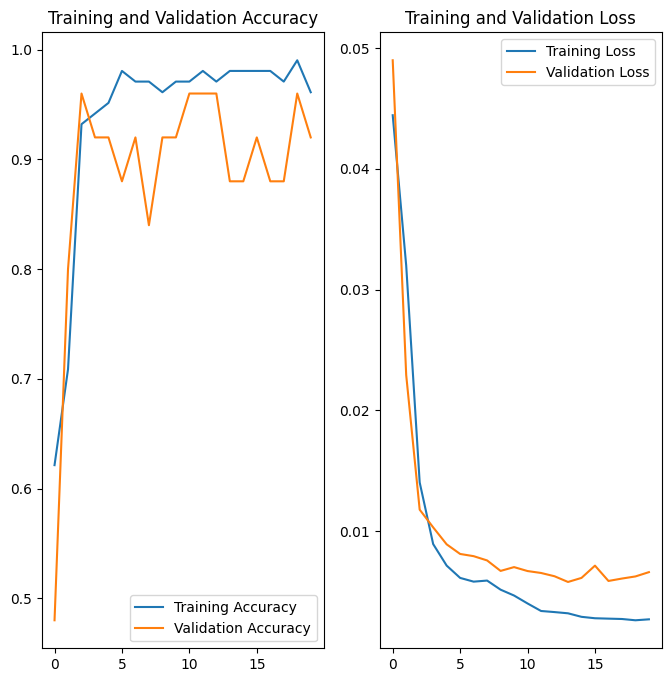

INFO:tensorflow:Assets written to: c:\Users\Jesse B\Documents\Projects\OBJ2CNN\model.json\assets


INFO:tensorflow:Assets written to: c:\Users\Jesse B\Documents\Projects\OBJ2CNN\model.json\assets


In [98]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(training_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save(filepath = '{}\\model.json'.format(os.getcwd()),save_format='tf')

In [49]:
model.save(filepath = '{}\\model.json'.format(os.getcwd()),save_format='tf')

'c:\\Users\\Jesse B\\Documents\\Projects\\OBJ2CNN'